# Interview Take Home Assignment (ICU)

#### Author: Viknesh
#### Round: Technical assessment

## Essential Libraries (For Data Analysis)

In [137]:
import numpy as np                     # Library for Numeric Computations in Python
import pandas as pd                    # Library for Data Acquisition and Preparation
import seaborn as sb                   # Low-level library for Data Visualisation 
import matplotlib.pyplot as plt        # High-level library for Data Visualisation
sb.set()                               # set the default Seaborn style for graphics

## Library for Plotly

In [138]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools

# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)

## Essential Libraries (For ML)

In [139]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score                            # Use F1 score to minimize FP and FN 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier                 # Library for Decision Tree
from sklearn.ensemble import RandomForestClassifier             # Library for Random Forest


## Importing of Data

In [140]:
icuData = pd.read_csv('ICU.csv')
icuData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   ID          200 non-null    int64
 2   Survive     200 non-null    int64
 3   Age         200 non-null    int64
 4   AgeGroup    200 non-null    int64
 5   Sex         200 non-null    int64
 6   Infection   200 non-null    int64
 7   SysBP       200 non-null    int64
 8   Pulse       200 non-null    int64
 9   Emergency   200 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


## Cleaning of Data

**(Remove data that contain 0 in BMI, BloodPressure, glucose)**

In [141]:
icuData.describe()

Unnamed: 0         ID     Survive         Age    AgeGroup         Sex  \
count  200.000000  200.00000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000  444.82000    0.800000   57.545000    2.025000    0.380000   
std     57.879185  271.91668    0.401004   20.054648    0.785788    0.486604   
min      1.000000    4.00000    0.000000   16.000000    1.000000    0.000000   
25%     50.750000  210.25000    1.000000   46.750000    1.000000    0.000000   
50%    100.500000  412.50000    1.000000   63.000000    2.000000    0.000000   
75%    150.250000  671.75000    1.000000   72.000000    3.000000    1.000000   
max    200.000000  929.00000    1.000000   92.000000    3.000000    1.000000   

        Infection       SysBP      Pulse   Emergency  
count  200.000000  200.000000  200.00000  200.000000  
mean     0.420000  132.280000   98.92500    0.735000  
std      0.494797   32.952099   26.82962    0.442441  
min      0.000000   36.000000   39.00000    0.000000  
25%      0.000000  110.000000   80.00000    0.000000  
50%      0.000000  130.000000   96.00000    1.000000  
75%      1.000000  150.000000  118.25000    1.000000  
max      1.000000  256.000000  192.00000    1.000000

# Modelling of Graph

In [142]:
diabetes_features = [x1 for i,x1 in enumerate(icuData.columns) if i!=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 5
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(5), ("Survive","Infection","SysBP","Pulse","Emergency"))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## Exploratory Data Analysis

**(Number of people who are Diabetic or Non-Diabetic)**

In [143]:
data = [
    go.Bar(
        # y=newdiabetesData['Outcome'].value_counts().to_dense().keys(),
        x=icuData['Survive'].value_counts(),
        orientation='h',
        text="",
    )]
layout = go.Layout(
    height=300,
    title='Number of people who are survive  or Non-survival index',
    hovermode='closest',
    xaxis=dict(title='No. of People', ticklen=2, zeroline=False, gridwidth=1),
    yaxis=dict(title='Survive', ticklen=2, gridwidth=1),
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='Number of people who are Survive or Non-Survival')

**1 -> Survival ; 0 -> Non-Survival**

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable a

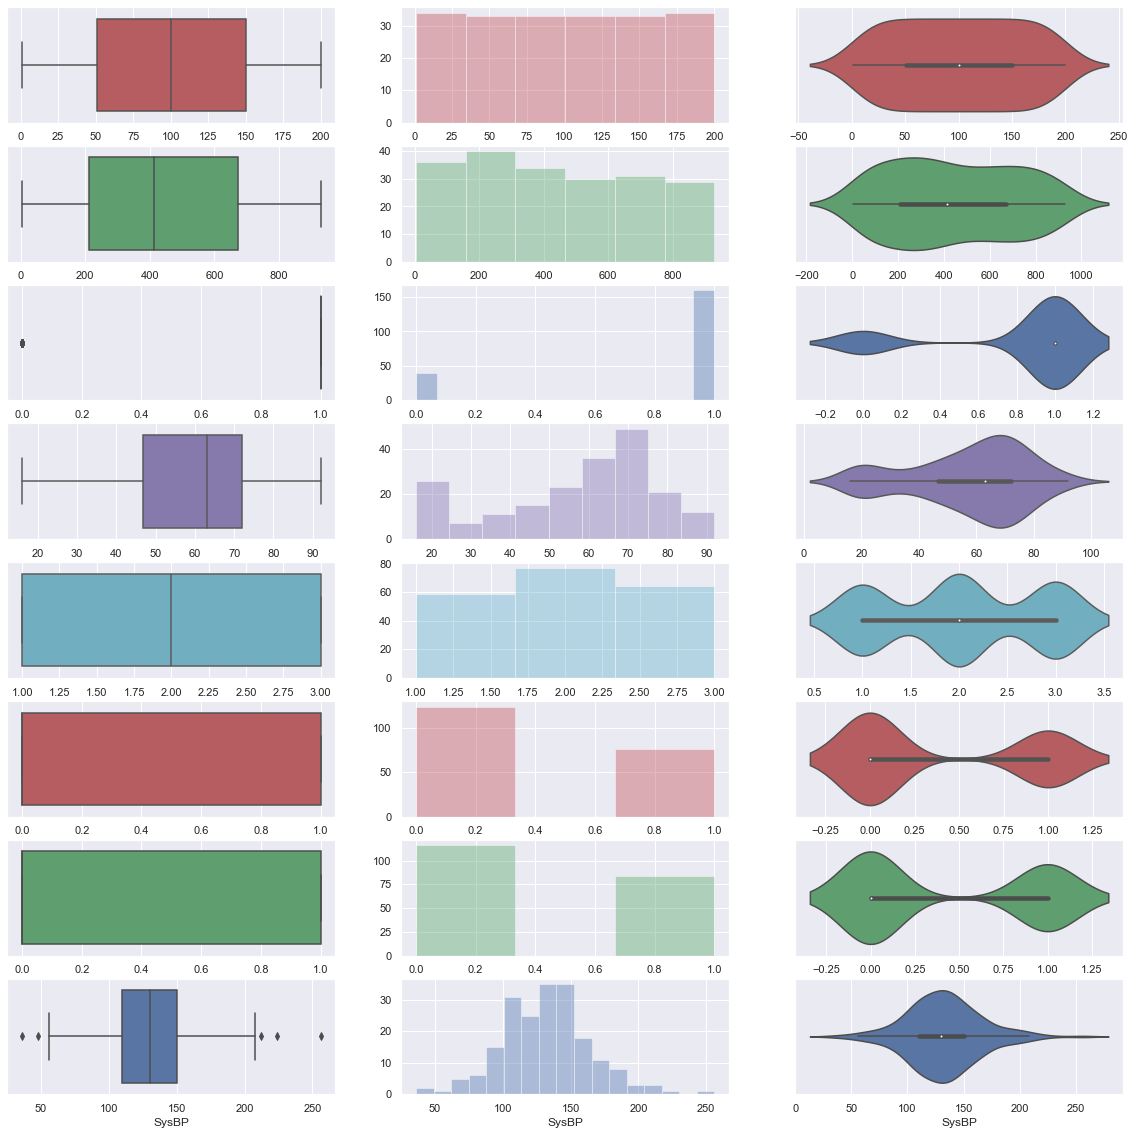

In [144]:
#Draw the distributions of all variable
f, axes = plt.subplots(8, 3, figsize=(20, 20))
colours = ["r", "g", "b", "m", "c","r", "g", "b", "m", "c"]

count = 0
for var in icuData:
    sb.boxplot(icuData[var], orient = "h", color = colours[count], ax = axes[count,0])
    sb.distplot(icuData[var], kde = False, color = colours[count], ax = axes[count,1])
    sb.violinplot(icuData[var],color = colours[count], ax = axes[count,2])
    count += 1
    if count == 8:
        break

            Unnamed: 0        ID   Survive       Age  AgeGroup       Sex  \
Unnamed: 0    1.000000  0.998219  0.087037 -0.135173 -0.094523  0.004996   
ID            0.998219  1.000000  0.090088 -0.133796 -0.092947  0.004507   
Survive       0.087037  0.090088  1.000000 -0.189458 -0.191370 -0.020602   
Age          -0.135173 -0.133796 -0.189458  1.000000  0.899328  0.096077   
AgeGroup     -0.094523 -0.092947 -0.191370  0.899328  1.000000  0.106451   
Sex           0.004996  0.004507 -0.020602  0.096077  0.106451  1.000000   
Infection    -0.127214 -0.129038 -0.182349  0.153555  0.102104  0.022541   
SysBP         0.006835  0.007579  0.204672  0.042594  0.044558  0.049428   
Pulse         0.024440  0.027351 -0.031761  0.037368  0.022495  0.039530   
Emergency     0.198488  0.199467 -0.243580 -0.186957 -0.197658  0.119972   

            Infection     SysBP     Pulse  Emergency  
Unnamed: 0  -0.127214  0.006835  0.024440   0.198488  
ID          -0.129038  0.007579  0.027351   0.199467 

<AxesSubplot:>

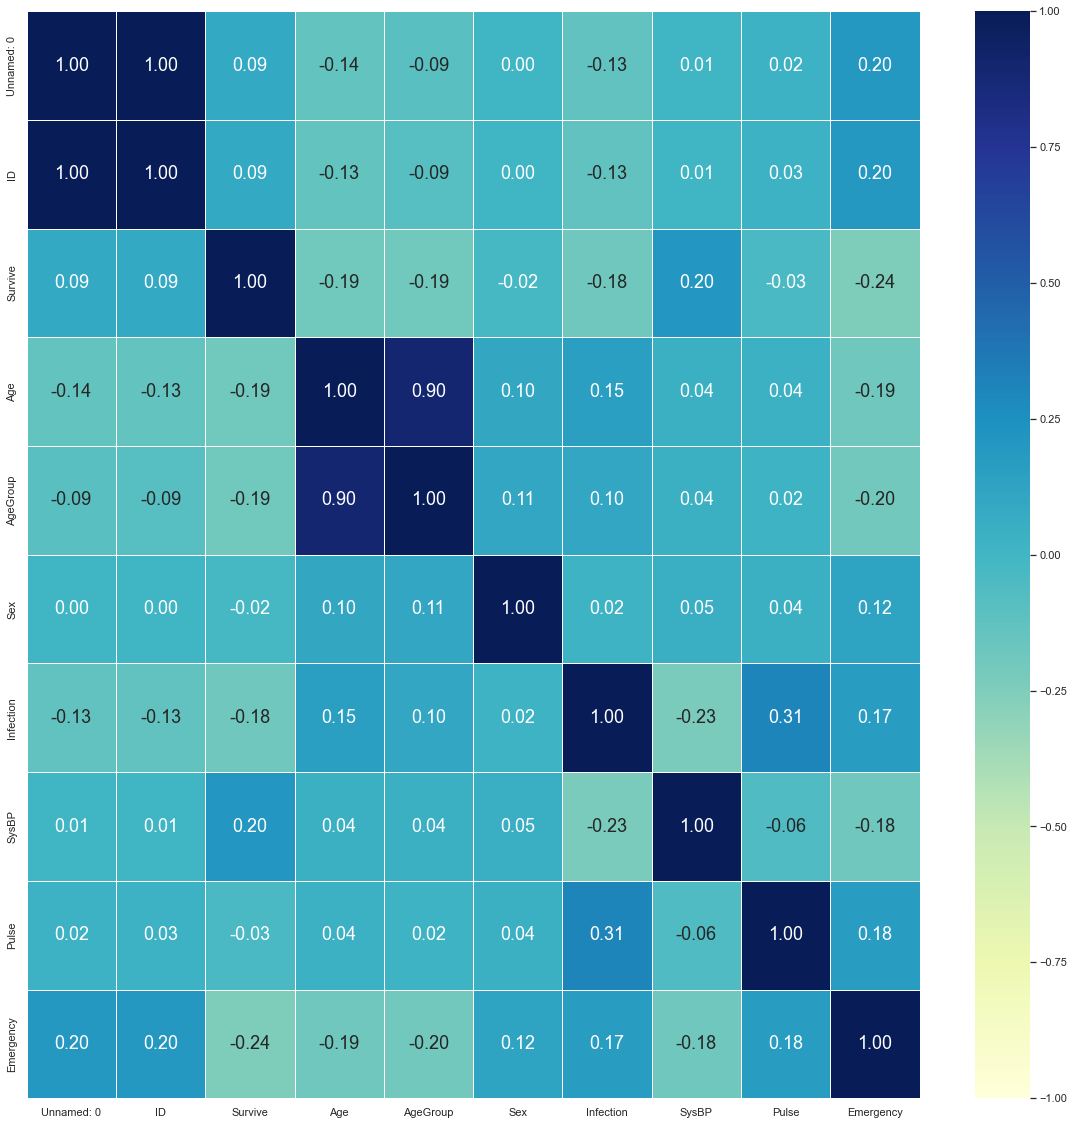

In [145]:
# Correlation Matrix
print(icuData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(icuData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "YlGnBu")

**CONCLUSIONS:**

1. AgeGroup and Age have high similarity scoreand they will not be good parameters to insert for the prediction outcome[survive].

2. Id and name parameter are also not required due to their low importace score when crossing to the survival rates interdependence.

3. Emergency also has to be denied but I will use it during the pretrial.


**1 -> High Correlation (Positive)**
**; 0 -> No Correlation** 
**; -1 -> High Correlation (Negative)**

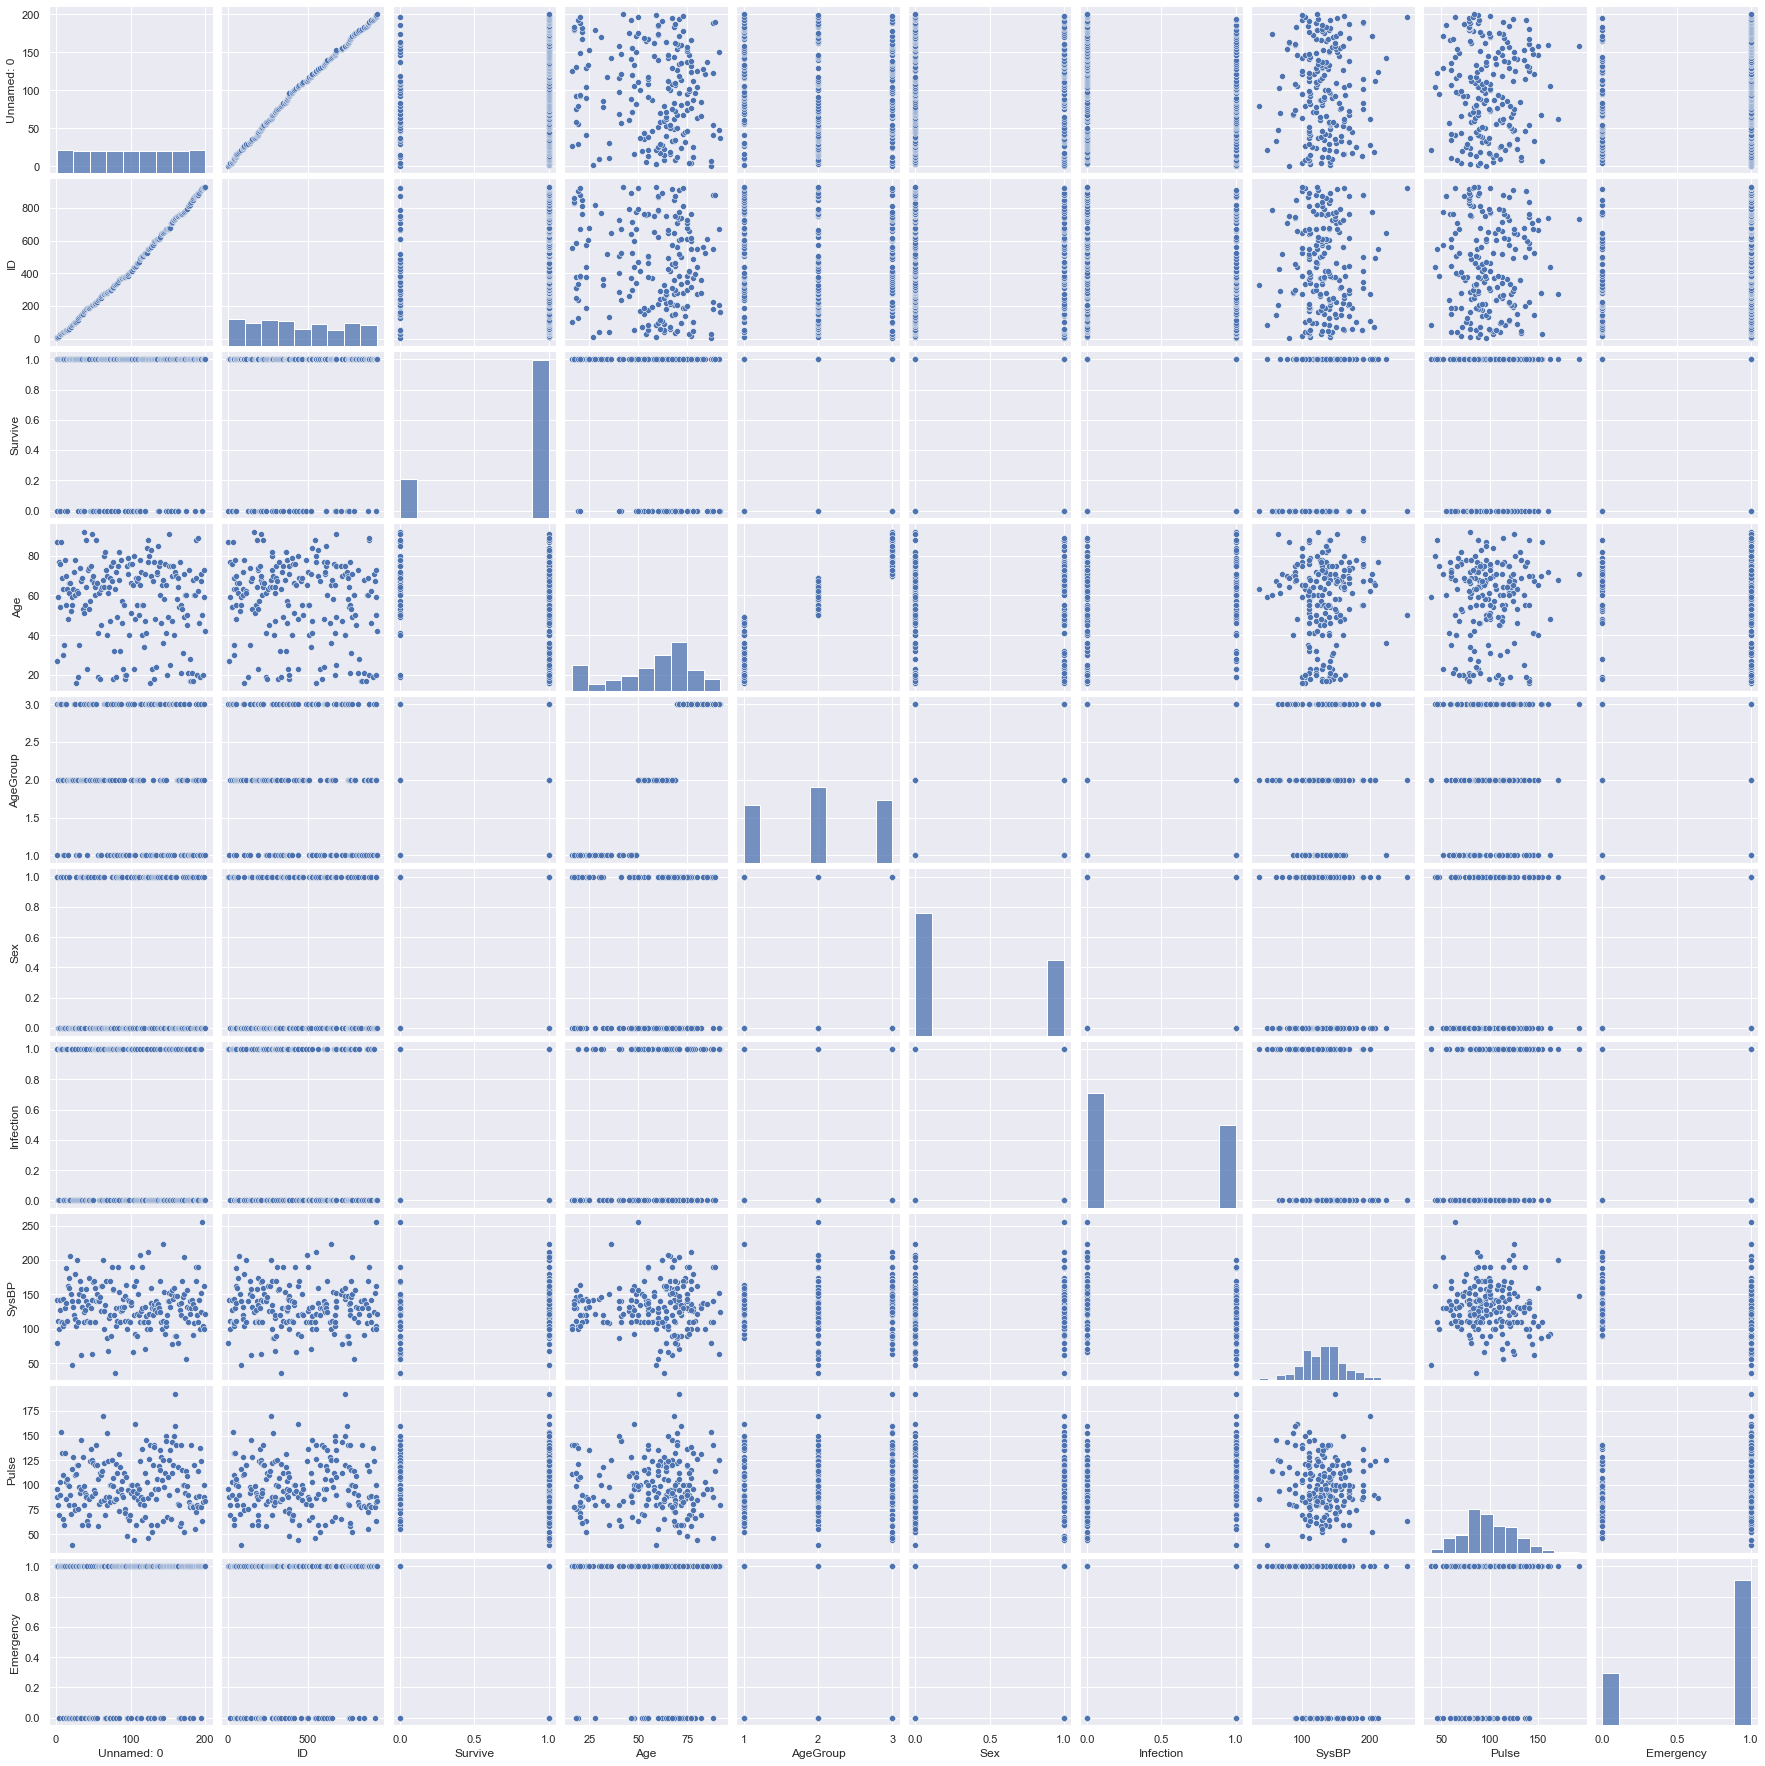

In [146]:
# Draw pairs of variables against one another
sb.pairplot(data = icuData)

**CONCLUSIONS:**
#####  Infection","SysBP","Pulse","Emergency will be used for Prediction.

# Splitting the Dataset

In [147]:
#Extract Respone and Predictors
Predictor = pd.DataFrame(icuData[["Infection","SysBP","Pulse","Emergency"]])
Outcome = pd.DataFrame(icuData["Survive"]) 

#Split the Dataset into Train and Test (Random)
Predictor_train,Predictor_test,Outcome_train,Outcome_test = train_test_split(Predictor, Outcome, test_size = 0.3)

## Logistic regression

c:\Python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Goodness of Fit of Model 	Train Dataset
Classification Accuracy  	: 0.891566265060241

Goodness of Fit of Model 	Test Dataset
Classification Accuracy  	: 0.888888888888889



<AxesSubplot:>

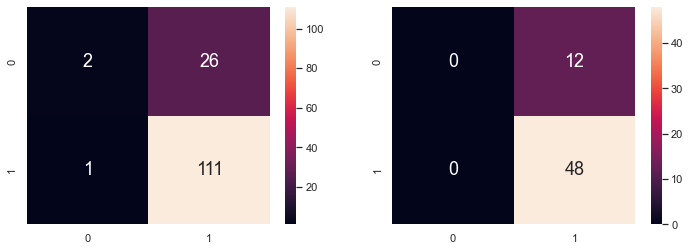

In [148]:
#Decision tree using train data
reg = LogisticRegression()                    # create the decision tree object 
reg.fit(Predictor_train, Outcome_train)                # train the decision tree model

# Predict Response corresponding to Predictors
Outcome_train_pred = reg.predict(Predictor_train) 
Outcome_test_pred = reg.predict(Predictor_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset") 
print("Classification Accuracy  \t:", f1_score(Outcome_train, Outcome_train_pred)) 
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset") 
print("Classification Accuracy  \t:", f1_score(Outcome_test, Outcome_test_pred)) 
print()

# Plot the Confusion Matrix for Train and Test
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
sb.heatmap(confusion_matrix(Outcome_train, Outcome_train_pred),
annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 
sb.heatmap(confusion_matrix(Outcome_test, Outcome_test_pred),
annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Decision Tree 


Goodness of Fit of Model 	Train Dataset
Classification Accuracy  	: 0.9427312775330396

Goodness of Fit of Model 	Test Dataset
Classification Accuracy  	: 0.86



<AxesSubplot:>

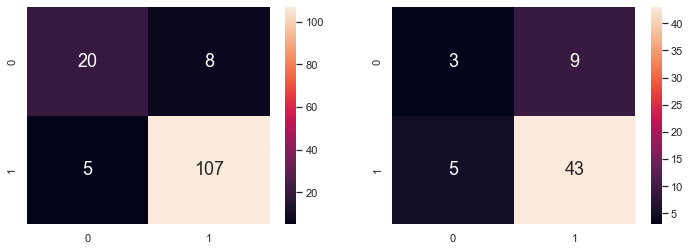

In [149]:
#Decision tree using train data
dectree = DecisionTreeClassifier(max_depth = 5)                    # create the decision tree object 
dectree.fit(Predictor_train, Outcome_train)                # train the decision tree model

# Predict Response corresponding to Predictors
Outcome_train_pred = dectree.predict(Predictor_train) 
Outcome_test_pred = dectree.predict(Predictor_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset") 
print("Classification Accuracy  \t:", f1_score(Outcome_train, Outcome_train_pred)) 
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset") 
print("Classification Accuracy  \t:", f1_score(Outcome_test, Outcome_test_pred)) 
print()
# Plot the Confusion Matrix for Train and Test
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
sb.heatmap(confusion_matrix(Outcome_train, Outcome_train_pred),
annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 
sb.heatmap(confusion_matrix(Outcome_test, Outcome_test_pred),
annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy  	: 0.9090909090909091

Goodness of Fit of Model 	Test Dataset
Classification Accuracy  	: 0.9038461538461539



<AxesSubplot:>

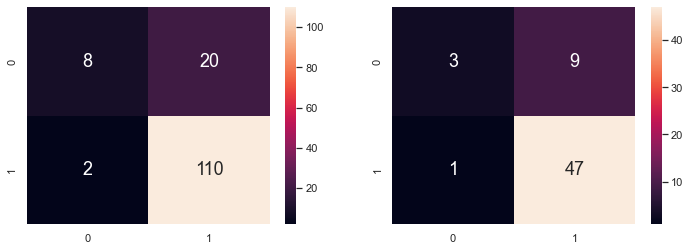

In [150]:
rf2 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf2.fit(Predictor_train, Outcome_train.values.ravel())

# Predict Response corresponding to Predictors
Outcome_train_pred = rf2.predict(Predictor_train)
Outcome_test_pred = rf2.predict(Predictor_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy  \t:", f1_score(Outcome_train, Outcome_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy  \t:", f1_score(Outcome_test, Outcome_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4)) 
sb.heatmap(confusion_matrix(Outcome_train, Outcome_train_pred),
annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 
sb.heatmap(confusion_matrix(Outcome_test, Outcome_test_pred),
annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Accurarcy of Different Machine Learning

In [151]:
# Parameters of classifiers
clfs = {'log regression':reg,
        'Decision Tree': dectree, 
        'Random Forest': rf2,}

# Function to fit classifier and make prediction
def train_classifier(clf, Predictor_train, Outcome_train):    
    clf.fit(Predictor_train, Outcome_train.values.ravel())
def predict_labels(clf, Predictor_test):
    return (clf.predict(Predictor_test))

pred_scores = []
for k,v in clfs.items():
    train_classifier(v, Predictor_train, Outcome_train) # fit classifier
    pred = predict_labels(v, Predictor_test) 
    pred_scores.append((k, [f1_score(Outcome_test, pred)]))

# User Input 

In [152]:
Infection,SysBP,Pulse,Emergency = input("Enter values accorrdingly (I,B,P,E): ").split() 
print("Infection: ", Infection)
print("BP: ", SysBP) 
print("Pulse: ", Pulse) 
print("Emergency: ", Emergency) 

Infection:  1
BP:  188
Pulse:  86
Emergency:  0


In [153]:
new_input = [[Infection,SysBP,Pulse,Emergency]]
new_array = np.array(new_input)
new_inputData = new_array.astype(np.float64)

In [154]:
new_output = reg.predict(new_inputData)
new_output1 = dectree.predict(new_inputData)
new_output2 = rf2.predict(new_inputData)


if new_output == 1:
    print("Logistic Regression (Prediction): ")
    print(new_input, "Pls treat with high priority survival rate is abnormal")
else:
    print("Logistic Regression (Prediction): ")
    print(new_input, "Survial rate is stable pls check back in an hour")
if new_output1 == 1:
    print("Decision Tree (Prediction): ")
    print(new_input, "Pls treat with high priority survival rate is abnormal")
else:
    print("Decision Tree (Prediction): ")
    print(new_input, "Survial rate is stable pls check back in an hour")
if new_output2 == 1:
    print("Random Forest (Prediction): ")
    print(new_input, "Pls treat with high priority survival rate is abnormal")
else:
    print("Random Forest (Prediction): ")
    print(new_input, "Survial rate is stable pls check back in an hour")



Logistic Regression (Prediction): 
[['1', '188', '86', '0']] Pls treat with high priority survival rate is abnormal
Decision Tree (Prediction): 
[['1', '188', '86', '0']] Pls treat with high priority survival rate is abnormal
Random Forest (Prediction): 
[['1', '188', '86', '0']] Pls treat with high priority survival rate is abnormal


**CONCLUSIONS:**
#####  The current models are using "Infection","SysBP","Pulse" and "Emergency" to predict the survical rate of the patients who are admited into the ICU.
#####  In my opinion I would conduct another model training with INPUT["Infection","SysBP","Pulse"] and predict another output parameter ["Emergency"] This secondary function would then  be nested above the survival models. as if emergency are handeled well survivability increases as well.